In [ ]:
# Data Collection and Cleaning

In [30]:
# Dependencies and Setup
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly
import plotly.express as pc
from scipy.stats import linregress
from sklearn import datasets

#import data files
data15_path = "Data/2015.csv"
data2015 = pd.read_csv(data15_path)
data2015['Year'] = 2015

data16_path = "Data/2016.csv"
data2016 = pd.read_csv(data16_path)
data2016['Year'] = 2016

data17_path = "Data/2017.csv"
data2017 = pd.read_csv(data17_path)
data2017['Year'] = 2017

data18_path = "Data/2018.csv"
data2018 = pd.read_csv(data18_path)
data2018['Year'] = 2018

data19_path = "Data/2019.csv"
data2019 = pd.read_csv(data19_path)
data2019['Year'] = 2019

data20_path = "Data/2020.csv"
data2020 = pd.read_csv(data20_path)
data2020['Year'] = 2020


In [31]:
#match all the files header name
data2017 = data2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
                                     'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 
                                      'Health..Life.Expectancy.':'Health (Life Expectancy)',
                                     'Trust..Government.Corruption.':'Trust (Government Corruption)', 
                                      'Dystopia.Residual':'Dystopia Residual'})
data2018 = data2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',
                                     'GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 
                                      'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 
                                      'Perceptions of corruption':'Trust (Government Corruption)'})
data2019 = data2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',
                                     'GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 
                                      'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 
                                      'Perceptions of corruption':'Trust (Government Corruption)'})
data2020 = data2020.rename(columns = {'Country name':'Country', 'Ladder score':'Happiness Score',
                                     'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support':'Family', 
                                      'Healthy life expectancy':'Health (Life Expectancy)',
                                     'Freedom to make life choices':'Freedom', 
                                      'Perceptions of corruption':'Trust (Government Corruption)'})

In [32]:
#store all the data into a new data frame
combined_data = pd.DataFrame(columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year'])
n = [data2015, data2016, data2017, data2018, data2019, data2020]

for i in n:
    combined_data = combined_data.append(i[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']], ignore_index = True)

# show the table    
combined_data.head()


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
# Data Review

In [33]:
#filter each year's data only show Country and Happiness Score
Score2015=data2015[['Country', 'Happiness Score']]
Score2016=data2016[['Country', 'Happiness Score']]
Score2017=data2017[['Country', 'Happiness Score']]
Score2018=data2018[['Country', 'Happiness Score']]
Score2019=data2019[['Country', 'Happiness Score']]
Score2020=data2020[['Country', 'Happiness Score']]

# rename the columns to show the year info
Score2015 = Score2015.rename(columns={'Happiness Score': 'Happiness2015'})
Score2016 = Score2016.rename(columns={'Happiness Score': 'Happiness2016'})
Score2017 = Score2017.rename(columns={'Happiness Score': 'Happiness2017'})
Score2018 = Score2018.rename(columns={'Happiness Score': 'Happiness2018'})
Score2019 = Score2019.rename(columns={'Happiness Score': 'Happiness2019'})
Score2020 = Score2020.rename(columns={'Happiness Score': 'Happiness2020'})


In [34]:
# merge all 5 years data
mergedtable = pd.merge(Score2015, Score2016, on=['Country'], how='inner', sort=False)

mergedtable1 = pd.merge(Score2017, Score2018, on=['Country'], how='inner', sort=False)

mergedtable2 = pd.merge(Score2019, Score2020, on=['Country'], how='inner', sort=False)

mergedtable3 = pd.merge(mergedtable, mergedtable1, on=['Country'], how='inner', sort=False)

mergedtable4 = pd.merge(mergedtable3, mergedtable2, on=['Country'], how='inner', sort=False)

# show the table
mergedtable4.head()

,Country,Happiness2015,Happiness2016,Happiness2017,Happiness2018,Happiness2019,Happiness2020
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456
3,Norway,7.522,7.498,7.537,7.594,7.554,7.4880
4,Canada,7.427,7.404,7.316,7.328,7.278,7.2321


In [35]:
#calculate average number for all columns and grouped by country
Average_score = round(combined_data.groupby(["Country"]).mean()["Happiness Score"],2)
Average_GDP = round(combined_data.groupby(["Country"]).mean()["Economy (GDP per Capita)"],2)
Average_fam = round(combined_data.groupby(["Country"]).mean()["Family"],2)
Average_health = round(combined_data.groupby(["Country"]).mean()["Health (Life Expectancy)"],2)
Average_free = round(combined_data.groupby(["Country"]).mean()["Freedom"],2)
Average_trust = round(combined_data.groupby(["Country"]).mean()["Trust (Government Corruption)"],2)
Average_gene = round(combined_data.groupby(["Country"]).mean()["Generosity"],2)

#create a data frame for the summary table
summary_table = pd.DataFrame({"Average Happiness Score":Average_score, "Average Economy (GDP per Capita)":Average_GDP, 
                             "Average Family":Average_fam, "Average Health (Life Expectancy)":Average_health, 
                             "Average Freedom":Average_free, "Average Trust (Government Corruption)":Average_trust, 
                             "Average Generosity":Average_gene})
#sort summary table by average happiness score
sorted_summary_df = summary_table.sort_values(by=['Average Happiness Score'], ascending=False)
sorted_summary_df.head()

,Average Happiness Score,Average Economy (GDP per Capita),Average Family,Average Health (Life Expectancy),Average Freedom,Average Trust (Government Corruption),Average Generosity
Country,,,,,,,
Finland,7.58,1.30,1.35,0.85,0.68,0.36,0.17
Denmark,7.56,1.34,1.37,0.84,0.68,0.39,0.28
Norway,7.53,1.44,1.35,0.85,0.69,0.33,0.30
Switzerland,7.52,1.40,1.34,0.90,0.67,0.37,0.25
Iceland,7.51,1.33,1.41,0.89,0.67,0.24,0.39


In [ ]:
# data statistics 

In [36]:
#Count and Display the total number of countries
total_countries = len(combined_data['Country'].value_counts())
countrycount = pd.DataFrame({"Total Countries":[total_countries]})

countrycount

,Total Countries
0,172


In [37]:
#Establish bins for scores
bins= [0,2.90,3.90,4.90,5.90,6.90,99.99]
groups = ["<2.99","3.00-3.99","4.00-4.99","5.00-5.99","6.00-6.99","7.00+"]

#Categorize the existing countries using the score bins.
combined_data["Score Group"] = pd.cut(combined_data["Happiness Score"], bins, labels=groups)

#Calculate the total counts and percentage by score groups
score_grouped = combined_data.groupby("Score Group")
total_count_by_score = score_grouped["Country"].nunique()
percentage_by_country = (total_count_by_score/total_countries)

#Create a summary data frame to hold the results
summary_by_score = pd.DataFrame({"Total Country Count":total_count_by_score, "Percentage":percentage_by_country})
summary_by_score["Percentage"] = summary_by_score["Percentage"].map("{:,.2%}".format)
summary_by_score.index = (["<2.99","3.00-3.99","4.00-4.99","5.00-5.99","6.00-6.99","7.00+"])
summary_by_score

,Total Country Count,Percentage
<2.99,4,2.33%
3.00-3.99,28,16.28%
4.00-4.99,65,37.79%
5.00-5.99,74,43.02%
6.00-6.99,58,33.72%
7.00+,24,13.95%


In [38]:
# Use groupby and summary statistical methods to calculate the following properties of country: 
# mean, median, variance, standard deviation, and SEM of the happiness score. 
score_mean = combined_data.groupby(["Country"])['Happiness Score'].mean()
score_median = combined_data.groupby(["Country"])['Happiness Score'].median()
score_variance = combined_data.groupby(["Country"])['Happiness Score'].var()
score_stdv = combined_data.groupby(["Country"])['Happiness Score'].std()
score_sem = combined_data.groupby(["Country"])['Happiness Score'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Happiness Score Mean":score_mean, 
                           "Happiness Score Median":score_median, 
                           "Happiness Score Variance":score_variance, 
                           "Happiness Score Std.Dev.":score_stdv, 
                           "Happiness Score SEM":score_sem})
summary_df


,Happiness Score Mean,Happiness Score Median,Happiness Score Variance,Happiness Score Std.Dev.,Happiness Score SEM
Country,,,,,
Afghanistan,3.355150,3.4675,0.192416,0.438653,0.179079
Albania,4.740950,4.6870,0.021783,0.147592,0.060254
Algeria,5.557183,5.4500,0.246257,0.496243,0.202590
Angola,3.872250,3.8305,0.012605,0.112272,0.056136
Argentina,6.378617,6.4810,0.081851,0.286096,0.116798
...,...,...,...,...,...
Venezuela,5.451700,5.1516,0.683155,0.826532,0.337430
Vietnam,5.187750,5.1390,0.018699,0.136743,0.055825
Yemen,3.609400,3.5602,0.071224,0.266878,0.108953


In [ ]:
# Data Visualization 

In [66]:
# install seaborn to run correlation matrix
!pip install seaborn



In [39]:
import seaborn as sns


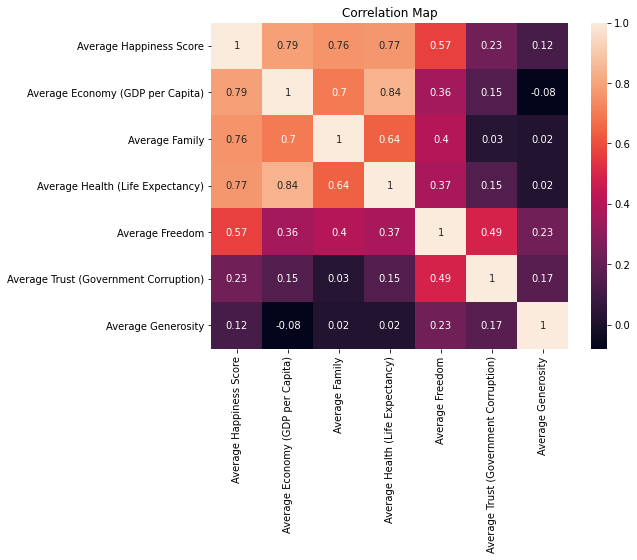

In [40]:
# run correlation matrix
corrMatrix = summary_table.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrMatrix.round(2), annot=True)

# set up title
plt.title("Correlation Map")
plt.savefig("Output_data/CorrelationMap.png")
plt.show()

The correlation between both factors is 0.79


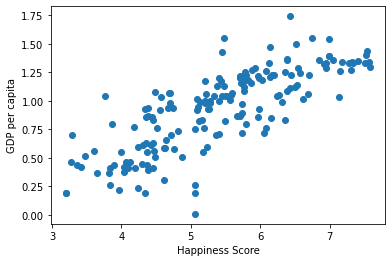

In [42]:
# run a scatter figure to show the correlation between overall score and Economy (GDP)
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,1])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
Happiness_Score = summary_table.iloc[:,0]
GDP_per_capita = summary_table.iloc[:,1]
correlation = st.pearsonr(Happiness_Score,GDP_per_capita)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs.Economy (GDP).png")
plt.show()


The correlation between both factors is 0.76


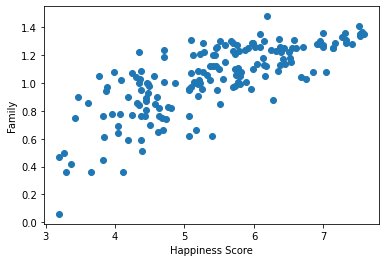

In [43]:
# run a scatter figure to show the correlation between overall score and Family
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,2])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('Family')
Happiness_Score = summary_table.iloc[:,0]
Family = summary_table.iloc[:,2]
correlation = st.pearsonr(Happiness_Score,Family)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs.Family.png")
plt.show()

The correlation between both factors is 0.77


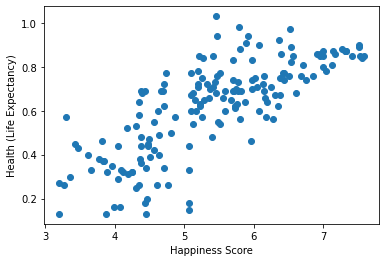

In [44]:
# run a scatter figure to show the correlation between overall score and Health
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,3])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
Happiness_Score = summary_table.iloc[:,0]
Health = summary_table.iloc[:,3]
correlation = st.pearsonr(Happiness_Score,Health)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs. Health.png")
plt.show()

The correlation between both factors is 0.57


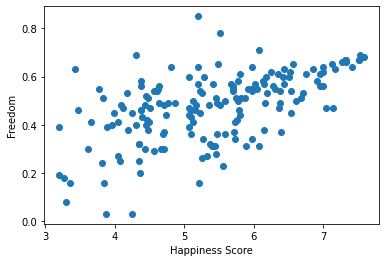

In [45]:
# run a scatter figure to show the correlation between overall score and Freedom
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,4])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
Happiness_Score = summary_table.iloc[:,0]
Freedom = summary_table.iloc[:,4]
correlation = st.pearsonr(Happiness_Score,Freedom)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs. Freedom.png")
plt.show()

The correlation between both factors is 0.23


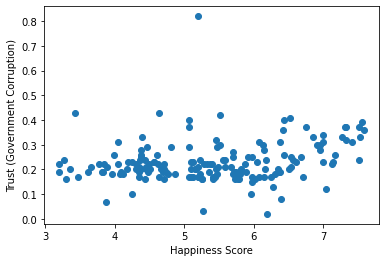

In [46]:
# run a scatter figure to show the correlation between overall score and Trust
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,5])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
Happiness_Score = summary_table.iloc[:,0]
Trust = summary_table.iloc[:,5]
correlation = st.pearsonr(Happiness_Score,Trust)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs. Trust.png")
plt.show()

The correlation between both factors is 0.12


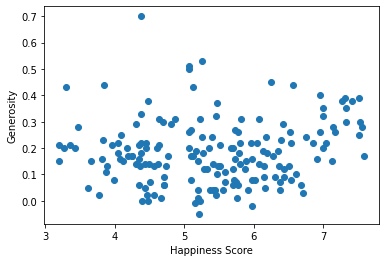

In [47]:
# run a scatter figure to show the correlation between overall score and Generosity
plt.scatter(summary_table.iloc[:,0],summary_table.iloc[:,6])

#set up labels
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
Happiness_Score = summary_table.iloc[:,0]
Generosity = summary_table.iloc[:,6]
correlation = st.pearsonr(Happiness_Score,Generosity)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#save the figure as a png file
plt.savefig("Output_data/Happiness vs. Generosity.png")
plt.show()

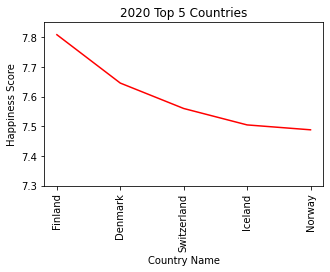

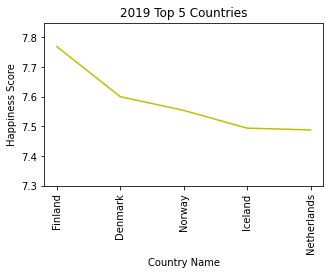

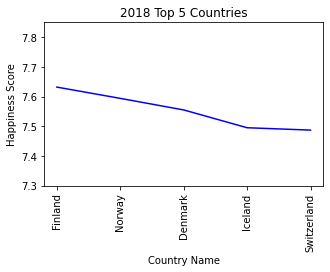

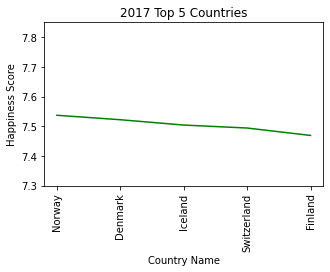

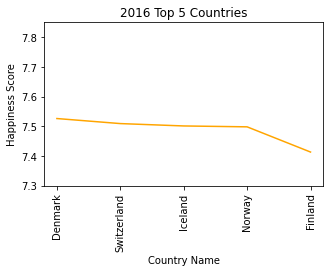

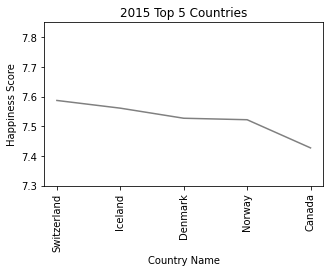

In [48]:
#run 5 line charts to show the top 5 countries that have highest score from 2015 - 2020
values = data2020.iloc[0:5,3]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2020.iloc[0:5,0], values, color = 'r')
plt.xticks(data2020.iloc[0:5,0], rotation='vertical')
plt.title("2020 Top 5 Countries")
plt.ylim(7.3,7.85)

values = data2019.iloc[0:5,2]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2019.iloc[0:5,1], values, color = 'y')
plt.xticks(data2019.iloc[0:5,1], rotation='vertical')
plt.title("2019 Top 5 Countries")
plt.ylim(7.3,7.85)

values = data2018.iloc[0:5,2]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2018.iloc[0:5,1], values, color = 'b')
plt.xticks(data2018.iloc[0:5,1], rotation='vertical')
plt.title("2018 Top 5 Countries")
plt.ylim(7.3,7.85)

values = data2017.iloc[0:5,2]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2017.iloc[0:5,0], values, color = 'g')
plt.xticks(data2017.iloc[0:5,0], rotation='vertical')
plt.title("2017 Top 5 Countries")
plt.ylim(7.3,7.85)

values = data2016.iloc[0:5,3]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2016.iloc[0:5,0], values, color = 'orange')
plt.xticks(data2016.iloc[0:5,0], rotation='vertical')
plt.title("2016 Top 5 Countries")
plt.ylim(7.3,7.85)

values = data2015.iloc[0:5,3]
fig2, ax2 = plt.subplots(figsize=(5,3))
plt.xlabel("Country Name")
plt.ylabel("Happiness Score")
plt.plot(data2015.iloc[0:5,0], values, color = 'gray')
plt.xticks(data2015.iloc[0:5,0], rotation='vertical')
plt.title("2015 Top 5 Countries")
plt.ylim(7.3,7.85)

#save the figures as a png file
plt.savefig("Output_data/Top 5 Countries 2015-2020.png")
plt.show()

<Figure size 432x288 with 0 Axes>

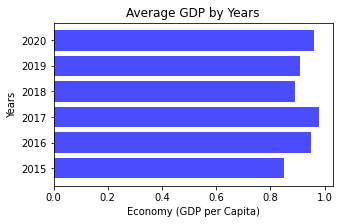

<Figure size 432x288 with 0 Axes>

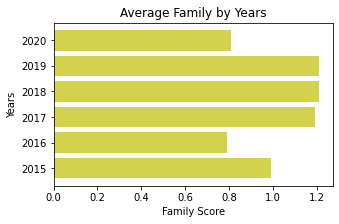

<Figure size 432x288 with 0 Axes>

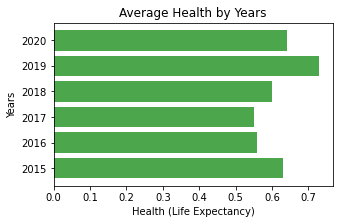

<Figure size 432x288 with 0 Axes>

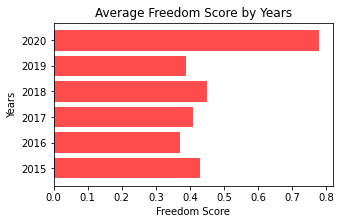

<Figure size 432x288 with 0 Axes>

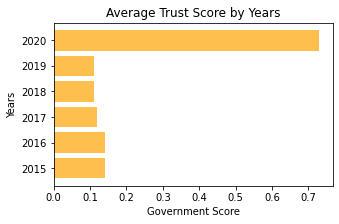

<Figure size 432x288 with 0 Axes>

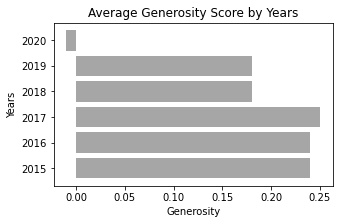

In [49]:
#run 5 bar charts to show the average score for each factor from 2015 - 2020

y_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
x_axis = [round(data2015["Economy (GDP per Capita)"].mean(),2), round(data2016["Economy (GDP per Capita)"].mean(),2), round(data2017["Economy (GDP per Capita)"].mean(),2),round(data2018["Economy (GDP per Capita)"].mean(),2), 
          round(data2019["Economy (GDP per Capita)"].mean(),2), round(data2020["Economy (GDP per Capita)"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(y_axis, x_axis, align='center', color = 'b', alpha = 0.7)
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Years")
plt.title("Average GDP by Years")

y_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
x_axis = [round(data2015["Family"].mean(),2), round(data2016["Family"].mean(),2), round(data2017["Family"].mean(),2),round(data2018["Family"].mean(),2), 
          round(data2019["Family"].mean(),2), round(data2020["Family"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(y_axis, x_axis, align='center', color = 'y', alpha = 0.7)
plt.xlabel("Family Score")
plt.ylabel("Years")
plt.title("Average Family by Years")

y_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
x_axis = [round(data2015["Health (Life Expectancy)"].mean(),2), round(data2016["Health (Life Expectancy)"].mean(),2), round(data2017["Health (Life Expectancy)"].mean(),2),round(data2018["Health (Life Expectancy)"].mean(),2), 
          round(data2019["Health (Life Expectancy)"].mean(),2), round(data2020["Health (Life Expectancy)"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(y_axis, x_axis, align='center', color = 'g', alpha = 0.7)
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Years")
plt.title("Average Health by Years")


x_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
y_axis = [round(data2015["Freedom"].mean(),2), round(data2016["Freedom"].mean(),2), round(data2017["Freedom"].mean(),2),round(data2018["Freedom"].mean(),2), 
          round(data2019["Freedom"].mean(),2), round(data2020["Freedom"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(x_axis, y_axis, align='center', color = 'r', alpha = 0.7)
plt.xlabel("Freedom Score")
plt.ylabel("Years")
plt.title("Average Freedom Score by Years")

x_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
y_axis = [round(data2015["Trust (Government Corruption)"].mean(),2), round(data2016["Trust (Government Corruption)"].mean(),2), round(data2017["Trust (Government Corruption)"].mean(),2),round(data2018["Trust (Government Corruption)"].mean(),2), 
          round(data2019["Trust (Government Corruption)"].mean(),2), round(data2020["Trust (Government Corruption)"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(x_axis, y_axis, align='center', color = 'orange', alpha = 0.7)
plt.xlabel("Government Score")
plt.ylabel("Years")
plt.title("Average Trust Score by Years")

x_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
y_axis = [round(data2015["Generosity"].mean(),2), round(data2016["Generosity"].mean(),2), round(data2017["Generosity"].mean(),2),round(data2018["Generosity"].mean(),2), 
          round(data2019["Generosity"].mean(),2), round(data2020["Generosity"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(5,3))
plt.barh(x_axis, y_axis, align='center', color = 'gray', alpha = 0.7)
plt.xlabel("Generosity")
plt.ylabel("Years")
plt.title("Average Generosity Score by Years")

#save the figures as a png file
plt.savefig("Output_data/Average scores 2015-2020.png")
plt.show()

In [50]:
# create a data frame to count the countries in each region
region_counts = pd.DataFrame(data2015.groupby(["Region"]).count()).reset_index()

#filter the data frame
region_counts = region_counts[["Region","Country"]]
region_counts = region_counts.rename(columns={"Country":"Count"})
region_counts

,Region,Count
0,Australia and New Zealand,2
1,Central and Eastern Europe,29
2,Eastern Asia,6
3,Latin America and Caribbean,22
4,Middle East and Northern Africa,20
5,North America,2
6,Southeastern Asia,9
7,Southern Asia,7
8,Sub-Saharan Africa,40
9,Western Europe,21


(-1.1000000086217028,
 1.1000000012258402,
 -1.1103791116775072,
 1.106936850205068)

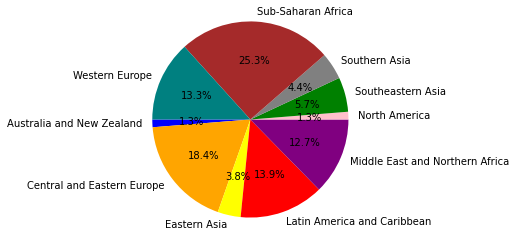

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (data2015.groupby(["Region"])["Country"].count()).tolist()
labels = ["Australia and New Zealand","Central and Eastern Europe", "Eastern Asia", "Latin America and Caribbean", 
         "Middle East and Northern Africa", "North America", "Southeastern Asia", "Southern Asia", "Sub-Saharan Africa", "Western Europe"]
color = ["blue","orange","yellow","red","purple","pink","green","gray","brown","teal"]
explode = (0,0,0,0,0,0,0,0,0,0)
plt.pie(gender_count, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=False, startangle=180)

#save the figures as a png file
plt.savefig("Output_data/total regions.png")
plt.axis("equal")

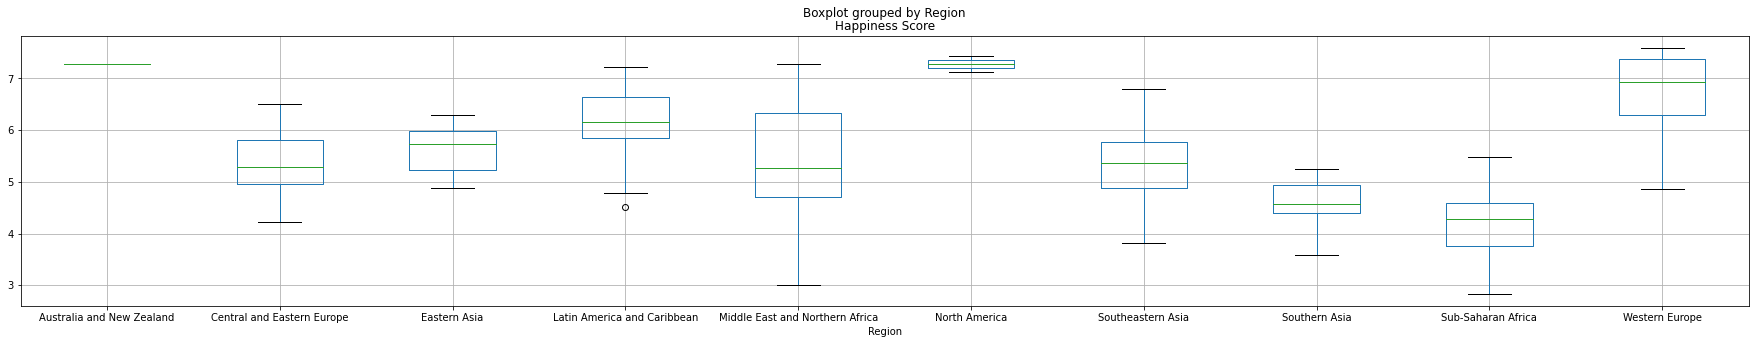

In [53]:
# Create a boxplot to compare 10 regions 
data2015.boxplot("Happiness Score", by="Region", figsize=(30,5))
#save the figures as a png file
plt.savefig("Output_data/total regions boxplot.png")

In [54]:
# Extract individual groups
group1 = data2015[data2015["Region"] == "Australia and New Zealand"]["Happiness Score"]
group2 = data2015[data2015["Region"] == "Central and Eastern Europe"]["Happiness Score"]
group3 = data2015[data2015["Region"] == "Eastern Asia"]["Happiness Score"]
group4 = data2015[data2015["Region"] == "Latin America and Caribbean"]["Happiness Score"]
group5 = data2015[data2015["Region"] == "Middle East and Northern Africa"]["Happiness Score"]
group6 = data2015[data2015["Region"] == "North America"]["Happiness Score"]
group7 = data2015[data2015["Region"] == "Southeastern Asia"]["Happiness Score"]
group8 = data2015[data2015["Region"] == "Southern Asia"]["Happiness Score"]
group9 = data2015[data2015["Region"] == "Sub-Saharan Africa"]["Happiness Score"]
group10 = data2015[data2015["Region"] == "Western Europe"]["Happiness Score"]

# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=24.758067552540272, pvalue=1.747680913974096e-25)

The r-squared is: 0.70419494132259


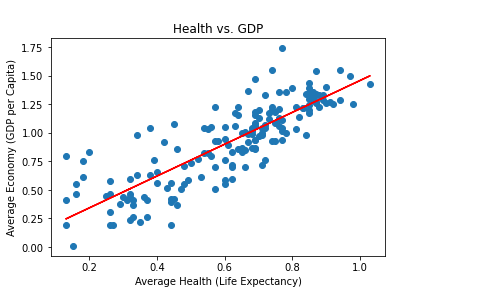

In [55]:
#Create x and y values
x_value = summary_table["Average Health (Life Expectancy)"]
y_value = summary_table["Average Economy (GDP per Capita)"]

#creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

#set up regression formula
regress_values = x_value * slope + intercept

#Set up line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")

plt.xlabel("Average Health (Life Expectancy)")
plt.ylabel("Average Economy (GDP per Capita)")
plt.title("Health vs. GDP")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_data/Health vs. GDP Regression.png")
plt.show()

The r-squared is: 0.624997360840446


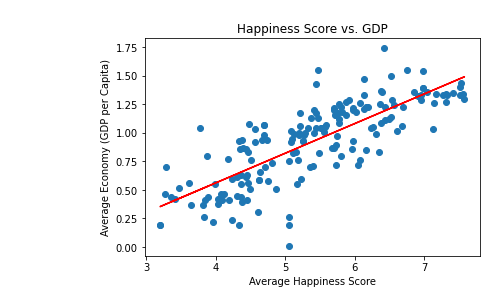

In [56]:
#Create x and y values
x_value = summary_table["Average Happiness Score"]
y_value = summary_table["Average Economy (GDP per Capita)"]

#creating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

#set up regression formula
regress_values = x_value * slope + intercept

#Set up line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")

plt.xlabel("Average Happiness Score")
plt.ylabel("Average Economy (GDP per Capita)")
plt.title("Happiness Score vs. GDP")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_data/Happiness vs.Economy Regression.png")
plt.show()

In [57]:
# plot a map to show the 172 countries' happiness score
fig = pc.scatter_geo(data2020,
    locations = data2020['Country'],
    locationmode = "country names",
    hover_data = ['Country','Happiness Score'],
    size='Happiness Score',
    color='Happiness Score',width=950,height=600)
# set up the map layout
fig.update_layout(title = dict(text="World Happiness Report 2020",y=0.9,x=0.5,xanchor='center',yanchor='top'),geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),margin=dict(l=20, r=50, t=110, b=20),font=dict(size=15,color='Black'))


fig.show()

In [ ]:
# Conclusion:
# The majority (43%) of the countries fall into 5-5.99 score group.
# Overall trend from 2015 – 2020, the score was going up.
# Denmark, Norway, Swizerland, Iceland made it to the top 5 list every year from 2015 – 2020.
# Economy (GDP) is highly related to Health (Life Expectancy).
# Overall score is highly related to GDP, Family, Health, has small relation to Government Corruption and Generosity.
# All 10 regions have different overall scores
